In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv(r"C:\Users\hp pavilion\Downloads\alien_sightings.csv", encoding='latin1')
df.head()

C:\Users\hp pavilion\AppData\Local\Temp\ipykernel_20924\3892460547.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\hp pavilion\Downloads\alien_sightings.csv", encoding='latin1')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [31]:
df.isnull().sum()


datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
dtype: int64

In [32]:
df.nunique()


datetime                75957
city                    22018
state                      68
country                     5
shape                      29
duration (seconds)        730
duration (hours/min)     9708
comments                88283
date posted               317
latitude                25407
longitude               20549
dtype: int64

In [33]:
df['shape'].value_counts()


shape
light        17872
triangle      8489
circle        8453
fireball      6562
unknown       6319
other         6247
disk          6005
sphere        5755
oval          4119
formation     2657
cigar         2241
changing      2140
flash         1472
rectangle     1418
cylinder      1382
diamond       1308
chevron       1007
egg            845
teardrop       817
cone           367
cross          265
delta            8
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64

In [34]:
df.sort_values(by='datetime', ascending=False)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
88657,9/9/2013 9:51,san diego,ca,us,light,4.0,~4 seconds,2 white lights zig-zag over Qualcomm Stadium (...,9/30/2013,32.715278,-117.156389
88656,9/9/2013 3:00,struthers,oh,us,unknown,120.0,2 minutes,I saw a routaing line of stares that seemed to...,9/9/2013,41.0525,-80.608056
88678,9/9/2013 23:30,ft. lauderdale,fl,us,oval,0.0,still occuring,Hovering object lit with red and white lights&...,9/30/2013,26.121944,-80.143611
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833
...,...,...,...,...,...,...,...,...,...,...,...
11924,1/1/1947 17:00,manama (bahrain),NaN,NaN,circle,300,5 minutes,Slow moving circular craft&#44 15 whitnesses&...,3/19/2009,26.216667,50.583333
11923,1/1/1945 12:00,ft. lee,va,NaN,cigar,0,short,Multi-colored object near Army base&#44 1945,4/16/2005,37.249053,-77.332431
11922,1/1/1944 12:00,wilderness,wv,NaN,disk,1814400,3 weeks,Two related reports of possible predecessor to...,7/8/2004,0,0.000000
11921,1/1/1944 12:00,san diego,ca,us,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,7/25/2004,32.7152778,-117.156389


In [42]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


In [44]:
df.sort_values(by='datetime', ascending = True).head(4)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
8686,1906-11-11 00:00:00,wien (austria),NaN,NaN,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208174,16.373819
11672,1910-01-02 00:00:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
49458,1910-05-28 21:00:00,solon,me,us,unknown,0,don&#39t know,entry in my great-grandmother&#39s diary&#44da...,12/5/2001,44.9494444,-69.858889
51857,1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

insurance = pd.read_csv(r"C:\Users\hp pavilion\Downloads\health_insurance.csv", encoding='latin1')
insurance.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [4]:
group_by_region = insurance.groupby('region')['charges'].mean()
group_by_region

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Text(0.5, 1.0, 'Average Charges by Region')

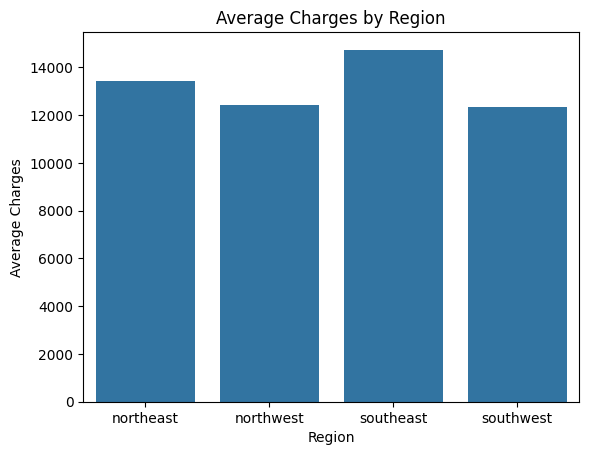

In [5]:
sns.barplot(x= group_by_region.index, y= group_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Charges by Region')

<Axes: xlabel='age', ylabel='Count'>

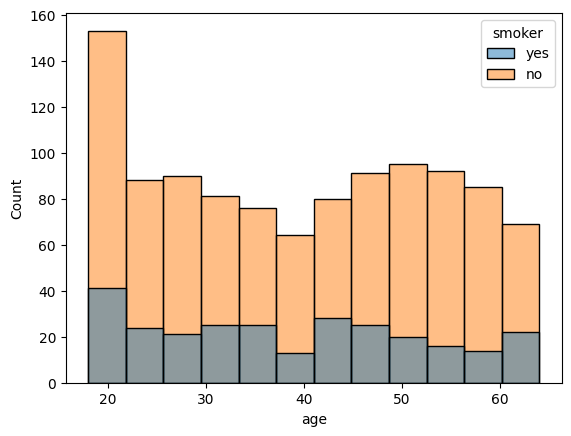

In [6]:
sns.histplot( data = insurance, x = 'age',  hue = 'smoker')


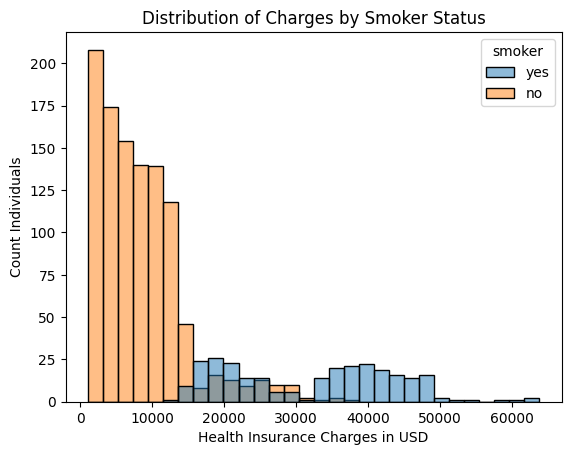

In [7]:
sns.histplot(data = insurance, x = 'charges', hue = 'smoker')
plt.xlabel('Health Insurance Charges in USD')
plt.ylabel('Count Individuals')
plt.title('Distribution of Charges by Smoker Status')

plt.show()



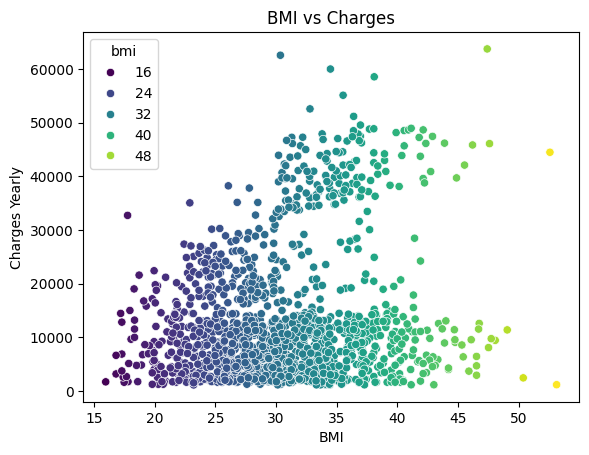

In [15]:
sns.scatterplot(data = insurance, x = 'bmi', y = 'charges', hue='bmi', palette='viridis')
plt.xlabel('BMI')
plt.ylabel('Charges Yearly')
plt.title('BMI vs Charges')
plt.show()


<Axes: xlabel='age', ylabel='charges'>

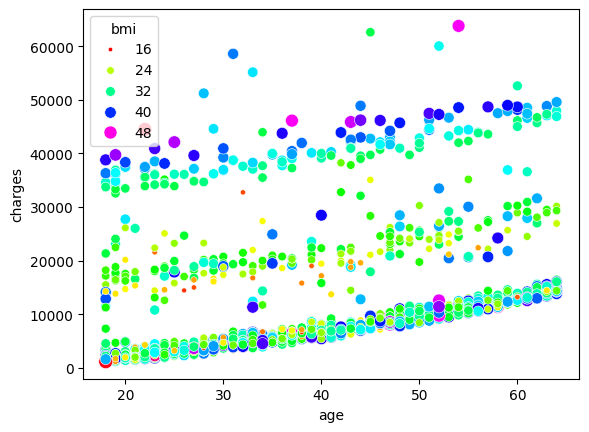

In [16]:
sns.scatterplot(data = insurance, x = 'age', y = 'charges', hue = 'bmi', size='bmi', sizes = (10, 100), palette = 'hsv')

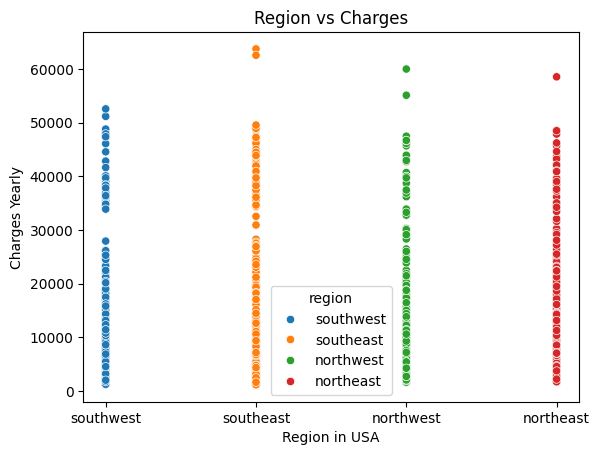

In [17]:
sns.scatterplot(data = insurance, x = 'region', y = 'charges', hue = 'region')
plt.xlabel('Region in USA')
plt.ylabel('Charges Yearly')
plt.title('Region vs Charges')
plt.show()


In [19]:
df_car_sales = pd.read_csv(r"C:\Users\hp pavilion\Downloads\car_sales.csv", encoding='latin1')
df_car_sales.head(4)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


In [20]:
df_car_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [25]:
df_car_sales.corr(numeric_only=True)


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


<Axes: >

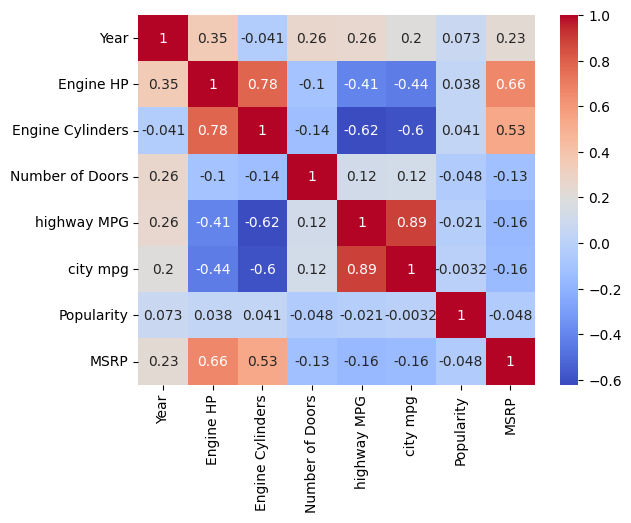

In [27]:
df_correlation = df_car_sales.corr(numeric_only=True)
sns.heatmap(df_correlation, annot = True, cmap='coolwarm')


In [31]:
df_correlation_spearman = df_car_sales.corr(method= 'spearman', numeric_only=True)
df_correlation_spearman

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.330883,-0.089457,0.241693,0.332119,0.301150,0.185043,0.517037
Engine HP,0.330883,1.000000,0.749650,-0.014737,-0.492900,-0.583996,0.030181,0.833080
Engine Cylinders,-0.089457,0.749650,1.000000,-0.105626,-0.765168,-0.837934,0.022236,0.472439
Number of Doors,0.241693,-0.014737,-0.105626,1.000000,0.137166,0.158429,-0.060008,0.073034
highway MPG,0.332119,-0.492900,-0.765168,0.137166,1.000000,0.951307,0.012727,-0.201473
city mpg,0.301150,-0.583996,-0.837934,0.158429,0.951307,1.000000,0.021129,-0.273546
Popularity,0.185043,0.030181,0.022236,-0.060008,0.012727,0.021129,1.000000,0.002283
MSRP,0.517037,0.833080,0.472439,0.073034,-0.201473,-0.273546,0.002283,1.000000


<Axes: xlabel='Engine Cylinders', ylabel='city mpg'>

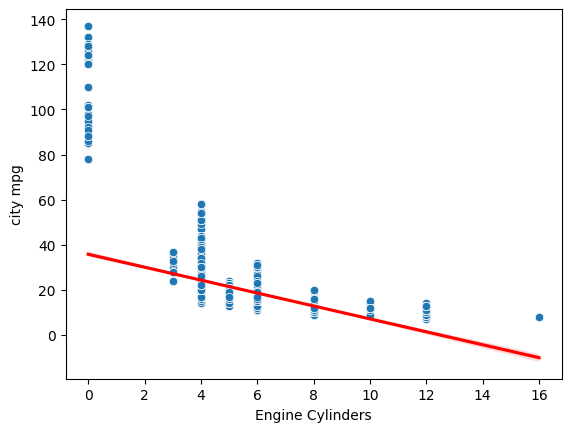

In [41]:
sns.scatterplot(data= df_car_sales, x = 'Engine Cylinders', y = 'city mpg')
sns.regplot(data = df_car_sales, x = 'Engine Cylinders', y = 'city mpg', scatter = False, color = 'red')

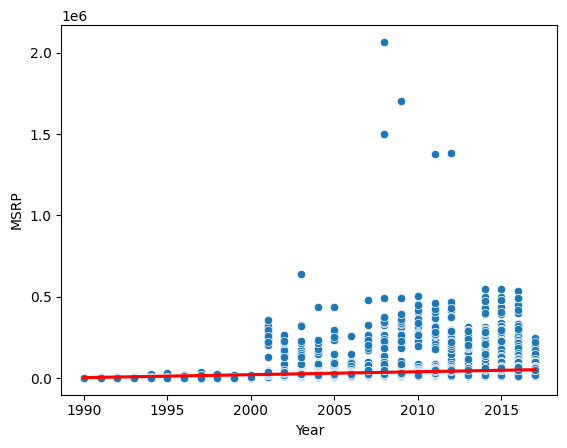

In [42]:
sns.scatterplot(data = df_car_sales, x = 'Year', y = 'MSRP')
sns.regplot(data = df_car_sales, x = 'Year', y = 'MSRP', scatter = False, color = 'red')
plt.show()
